# 线性回归

主要内容包括：

1. 线性回归的基本要素
2. 线性回归模型从零开始的实现
3. 线性回归模型使用 Tensorflow 的简洁实现

代码基于 `TensorFlow 2.0`。



线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，如预测房屋价格、气温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概念和技术同样适用于大多数的深度学习模型。我们首先以线性回归为例，介绍大多数深度学习模型的基本要素和表示方法。


## 线性回归的基本要素

### 模型
设房屋的面积为 $x_1$，房龄为 $x_2$，售出价格为 $y$。我们需要建立基于输入 $x_1$ 和 $x_2$ 来计算输出 $y$ 的表达式，也就是模型（model）。顾名思义，线性回归假设输出与各个输入之间是线性关系：
$$
\hat{y} = x_1 w_1 + x_2 w_2 + b
$$
其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出 $\hat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。我们通常允许它们之间有一定误差。



### 数据集
我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。
### 损失函数
在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方孙树函数。 它在评估索引为 $i$ 的样本误差的表达式为


$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,
$$



$$
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.
$$

在模型训练中，我们希望找出一组模型参数，记为 $w_1^*, w_2^*, b^*$，来使训练样本平均损失最小：
$$
w_1^*, w_2^*, b^* = \underset{w_1, w_2, b}{\arg\min} \ell(w_1, w_2, b)
$$

### 优化函数 - 随机梯度下降
当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。   

$$
(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)
$$
  
  
 在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：
$$
\begin{aligned}
w_1 &\leftarrow w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} = w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} = w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
b &\leftarrow b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b} = b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$
学习率: $\eta$代表在每次优化中，能够学习的步长的大小    
批量大小: $\mathcal{B}$是小批量计算中的批量大小batch size   

总结一下，优化函数的有以下两个步骤：

- (i)初始化模型参数，一般来说使用随机初始化；
- (ii)我们在数据上迭代多次，通过在负梯度方向移动参数来更新每个参数。

### 神经网络表示


在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，图1使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差。

<div align=center>
<img width="250" src="../img/chapter03/3.1_linreg.svg"/>
</div>
<div align=center>图1 线性回归是一个单层神经网络</div>

在图1所示的神经网络中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为2。输入个数也叫特征数或特征向量维度。图1中网络的输出为 $o$，输出层的输出个数为1。需要注意的是，我们直接将图1中神经网络的输出 $o$ 作为线性回归的输出，即 $\hat{y} = o$。由于输入层并不涉及计算，按照惯例，图1所示的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫神经元。在线性回归中，$o$ 的计算依赖于 $x_1$ 和 $x_2$。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）。

## 矢量计算
在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的两种方法。


1. 向量相加的一种方法是，将这两个向量按元素逐一做标量加法。
2. 向量相加的另一种方法是，将这两个向量直接做矢量加法。

In [1]:
import tensorflow as tf
from time import time
print(tf.__version__)

2.1.0


定义下面两个 1000 维的向量

In [3]:
a = tf.ones((1000,))
b = tf.ones((1000,))

现在我们可以来测试了。首先将两个向量使用for循环按元素逐一做标量加法。

In [5]:
start = time()
c = tf.Variable(tf.zeros((1000,)))
for i in range(1000):
    c[i].assign(a[i] + b[i])

time() - start

0.28026413917541504

向量相加的另一种方法是，将这两个向量直接做矢量加法。

In [6]:
start = time()
c.assign(a + b)
time() - start

0.014528751373291016

结果很明显,后者比前者运算速度更快。因此，我们应该尽可能采用矢量计算，以提升计算效率。

让我们再次回到本节的房价预测问题。如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到
$$
\begin{aligned}
\hat{y}^{(1)} &= x_1^{(1)} w_1 + x_2^{(1)} w_2 + b,\\
\hat{y}^{(2)} &= x_1^{(2)} w_1 + x_2^{(2)} w_2 + b,\\
\hat{y}^{(3)} &= x_1^{(3)} w_1 + x_2^{(3)} w_2 + b.
\end{aligned}
$$
现在，我们将上面3个等式转化成矢量计算。设
$$
\boldsymbol{\hat{y}} =
\begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \hat{y}^{(3)}
\end{bmatrix},\quad
\boldsymbol{X} =
\begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} \\
    x_1^{(2)} & x_2^{(2)} \\
    x_1^{(3)} & x_2^{(3)}
\end{bmatrix},\quad
\boldsymbol{w} =
\begin{bmatrix}
    w_1 \\
    w_2
\end{bmatrix}
$$
对3个房屋样本预测价格的矢量计算表达式为$\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b,$ 其中的加法运算使用了广播机制。例如：

In [7]:
a = tf.ones((3,))
b = 10
a + b

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([11., 11., 11.], dtype=float32)>

## 线性回归模型从零开始的实现



In [8]:
# import packages and modules
%matplotlib inline
import tensorflow as tf
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(tf.__version__)

2.1.0


### 生成数据集
使用线性模型来生成数据集，生成一个1000个样本的数据集，下面是用来生成数据的线性关系：

$$
\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b
$$



In [44]:
# 特征数
num_inputs = 2
# 样本数
num_examples = 1000
# 权重 w 向量
true_w = [2, -3.4]
# 偏差
true_b = 4.2

features = tf.random.normal((num_examples, num_inputs), stddev=1)
labels = true_w[0] * features[:,0] + true_w[1] * features[:, 1] + true_b
# 添加随机噪声
labels += tf.random.normal(labels.shape, stddev=0.01)

In [20]:
print(features[0], labels[0])
print(features.shape,labels.shape)

tf.Tensor([ 0.7026267 -0.5950136], shape=(2,), dtype=float32) tf.Tensor(7.6275563, shape=(), dtype=float32)
(1000, 2) (1000,)


### 使用图像来展示生成的数据

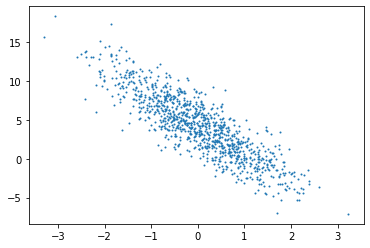

In [15]:
plt.scatter(features[:, 1], labels, 1);

### 读取数据集返回批量数据

In [45]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 样本读取顺序随机，会遍历所有样本
    random.shuffle(indices)
    # 每次取 batch_size 的数据
    for i in range(0, num_examples, batch_size):
        # j 为索引数组
        j = indices[i: min(i+batch_size, num_examples)]
        # axis表示维度，indices表示在axis维度上要取数据的索引
        # tf.gather（在某一维度指定index）
        # yield features[j], labels[j]
        yield tf.gather(features, axis=0, indices=j), tf.gather(labels, axis=0, indices=j)

In [46]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 0.15303102 -0.34378156]
 [-0.25278276  1.9003394 ]
 [ 1.4838715   0.98826146]
 [ 0.589835    0.3098992 ]
 [ 0.47091532  0.18669523]
 [ 0.24663025 -0.22130807]
 [ 1.0166736   1.6568373 ]
 [-0.46696392 -1.4222957 ]
 [ 1.2127599  -0.5779025 ]
 [-0.00413441 -0.6999474 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[ 5.674328   -2.7682092   3.8202336   4.316163    4.499334    5.4640665
  0.59213424  8.106868    8.59062     6.573457  ], shape=(10,), dtype=float32)


### 初始化模型参数

In [47]:
# 2行1列，正态分布随机数
w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

### 定义模型
定义用来训练参数的训练模型：

$$
\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b
$$



In [48]:
def linreg(X, w, b):
    return tf.matmul(X, w) + b

### 定义损失函数
我们使用的是均方误差损失函数：
$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,
$$


In [49]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

### 定义优化函数
在这里优化函数使用的是小批量随机梯度下降：

$$
(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)
$$
  

In [50]:
def sgd(params, lr, batch_size, grads):
    """
    Mini-batch stochastic gradient descent.
    lr: 步长
    grads: tf 自动梯度计算等到的梯度和
    """
    # 对每一个参数求梯度，并更新
    for i, param in enumerate(params):
        # grads 除以批量大小，得到平均值
        param.assign_sub(lr * grads[i] / batch_size)

### 训练
当数据集、模型、损失函数和优化函数定义完了之后就可来准备进行模型的训练了。


In [32]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as t:
            t.watch([w, b])
            #print(net(X, w, b))
            #print(y)
            l = loss(net(X, w, b), y)
            l = tf.reduce_sum(l)
        # 求 w ，b 梯度
        grads = t.gradient(l, [w,b])
        # 梯度下降, 更新参数
        sgd([w, b], lr, batch_size, grads)       
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.036769
epoch 2, loss 0.000132
epoch 3, loss 0.000050


In [34]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.9997437],
       [-3.3994198]], dtype=float32)>
4.2 
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1998153], dtype=float32)>


## 线性回归模型的简洁实现


### 生成数据集
在这里生成数据集跟从零开始的实现中是完全一样的。

In [17]:
import tensorflow as tf

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = tf.random.normal(shape=(num_examples, num_inputs),stddev=1)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
# labels 增加随机干扰
labels += tf.random.normal(labels.shape, stddev=0.01)

### 读取数据集

In [35]:
from tensorflow import data as tfdata

batch_size = 10
# 将训练集的特征和标签组合
dataset = tfdata.Dataset.from_tensor_slices((features, labels))
# 随机读取小批量数据
dataset = dataset.shuffle(buffer_size=num_examples)
dataset = dataset.batch(batch_size)
# iter 方法创建一个迭代器
data_iter = iter(dataset)

In [36]:
for X, y in data_iter:
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.1669998   0.44764984]
 [-0.08119935 -0.96780413]
 [-0.57150066 -0.7719588 ]
 [ 0.7352289  -0.17188445]
 [ 0.26945013 -0.6415312 ]
 [ 0.21700485  1.0177644 ]
 [-1.5488733   0.5636575 ]
 [-2.616565   -0.8470878 ]
 [ 0.23921391 -0.19487649]
 [-0.6440835  -1.2607629 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[ 2.3396387   7.330994    5.670597    6.2626505   6.9204926   1.1823338
 -0.81205755  1.8415534   5.333409    7.2056746 ], shape=(10,), dtype=float32)


### 定义模型和初始化参数

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import initializers as init

model = keras.Sequential()
model.add(layers.Dense(1, kernel_initializer=init.RandomNormal(stddev=0.01)))

### 定义损失函数

In [38]:
from tensorflow import losses
loss = losses.MeanSquaredError()

### 定义优化函数

In [39]:
from tensorflow.keras import optimizers
trainer = optimizers.SGD(learning_rate=0.03)

### 训练

In [40]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for (batch, (X, y)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            l = loss(model(X, training=True), y)
        grads = tape.gradient(l, model.trainable_variables)
        trainer.apply_gradients(zip(grads, model.trainable_variables))
        
    l = loss(model(features), labels)
    print('epoch %d, loss: %f' % (epoch, l))

epoch 1, loss: 0.000215
epoch 2, loss: 0.000100
epoch 3, loss: 0.000101


In [43]:
print(true_w, model.get_weights()[0])

print(true_b, model.get_weights()[1])

[2, -3.4] [[ 2.0008821]
 [-3.3996172]]
4.2 [4.200015]


## 两种实现方式的比较
1. 从零开始的实现（推荐用来学习）

   能够更好的理解模型和神经网络底层的原理
   

2. 使用`Tensorflow`可以更简洁地实现模型。

    `tensorflow.data`模块提供了有关数据处理的工具，`tensorflow.keras.layers`模块定义了大量神经网络的层，`tensorflow.initializers`模块定义了各种初始化方法，`tensorflow.optimizers`模块提供了模型的各种优化算法。
   